In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1/'

In [ ]:
PH_data_four = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_four = data['PH'] == 4
    PH_data_four = PH_data_four.append(data[PH_four])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_four.to_pickle('PH_data_four.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_four.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_four.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
548,676,676200405111519,2004,5,11,15,27,26,119.983559,0.345768,...,39.062599,53.711075,0.0,0,132.00,35.94701,1,131464,0,9818
549,676,676200405111519,2004,5,11,15,27,27,119.983559,-2.354687,...,39.062599,53.711075,0.0,0,132.00,35.94701,1,131464,0,9810
550,676,676200405111519,2004,5,11,15,27,28,119.983559,-1.515911,...,34.179775,53.711075,0.0,0,132.00,35.94701,1,131464,0,9792
551,676,676200405111519,2004,5,11,15,27,29,119.983559,-1.290871,...,39.062599,53.711075,0.0,0,132.00,35.94701,1,131464,0,9790
552,676,676200405111519,2004,5,11,15,27,30,119.983559,-2.722931,...,39.062599,58.593899,0.0,0,132.00,35.94701,1,131464,0,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,676,676201003140736,2002,3,14,8,2,10,119.954262,-5.730259,...,34.179775,58.593899,0.0,0,241.75,5.97652,1,196948,0,3990
1601,676,676201003140736,2002,3,14,8,2,11,119.939613,-5.914379,...,34.179775,58.593899,0.0,0,241.75,5.97652,1,196944,0,4042
1602,676,676201003140736,2002,3,14,8,2,12,119.939613,-5.382473,...,34.179775,58.593899,0.0,0,241.75,5.97652,1,196940,0,4124
1603,676,676201003140736,2002,3,14,8,2,13,119.954262,-6.303082,...,34.179775,58.593899,0.0,0,241.75,5.97652,1,196936,0,4192


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:

rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_two_rf_gen_four.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['OIT_1' 'CCPF_Max' 'CCPF_Min' 'CCPF_Mean' 'OIT_2' 'HDGS' 'AOAI_Min'
 'AOAI_Mean' 'PACK' 'RUDP_Min' 'RUDP_Max' 'TRK_Min' 'OIPL' 'EVNT' 'FADS'
 'TRKM_Min' 'RUDP_Mean' 'SNAP' 'TRKM_Mean' 'TRK_Mean' 'ALT_Min' 'MRK'
 'ALT_Mean' 'PS_Min' 'TH_Min' 'ALT_Max' 'SPLY' 'PI_Min' 'APUF_Min'
 'MSQT_2_Max' 'APUF_Mean' 'MH_Mean' 'SPL_1' 'AOA1_Mean' 'LONG_Min'
 'CASM_Mean' 'MACH_Mean' 'FQTY_3' 'LONG_Max' 'CASM_Min' 'MSQT_1_Mean'
 'SPL_2' 'MH_Max' 'PUSH' 'FIRE_4' 'LONG_Mean' 'DA_Mean' 'CAS_Max' 'Second'
 'PS_Max' 'N1T_Mean' 'LATG_Max' 'LATG_Mean' 'MSQT_2_Mean' 'BAL2_Mean'
 'N1T_Min' 'PSA_Min' 'PI_Max' 'PH' 'BAL1_Max' 'BAL2_Min' 'PSA_Max'
 'TH_Mean' 'MACH_Min' 'PI_Mean' 'MSQT_1_Min' 'MSQT_2_Min' 'AOA2_Max'
 'GS_Mean' 'CCPC_Mean' 'TMAG' 'CAS_Mean' 'PT_Max' 'POVT' 'FQTY_1' 'DA_Max'
 'AOA2_Min' 'FLAP' 'CCPC_Min' 'FQTY_4' 'FIRE_2' 'AOA2_Mean' 'MSQT_1_Max'
 'GS_Min' 'TOCW_Mean' 'VHF3' 'CAS_Min' 'PT_Mean' 'SHKR_Mean' 'LONP'
 'BAL2_Max' 'HF1' 'MNS' 'SAT' 'LATP' 'SHKR_Min' 'TOCW_Min' 'SHKR_Max'
 'ELEV_2' 'ELEV_1

In [ ]:
print(np.argsort(rfr.feature_importances_))

[ 39  76  75  74  40  24 129 128  43 105 106 174  38   9  11 177 104  51
 176 173 114  35 113  93 171 115  53  90  69  88  68 158  54 119 153 140
 155  20 154 141  83  55 160  47  16 152 143 139   5  94 161 151 149  86
 134 162  96  91  44 133 135  97 170 156  89  84  87 124 146  71  59 137
 100  45  18 145 123  17  72  21  14 122  85 147 110  63 138  98 107  33
 136  25  34  48  30 108 111 109   8   7   6  10  23  95  82  92 150  81
 178  99  49  70 165 112 148 120 172 159 157 121  61   2  73 179   3   0
  46 163  60  52 117 181  79  15  62 180   1  42 175   4 164  56  19  31
  28  32  41 116  13  50  22  58 169  29 167 168 102  57  36  26 166  80
  37 103 101 126  27 131 144 142 130 132 125 127  77  66  12  64  78  67
  65 118]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 50.41708063061079


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9987396148214992


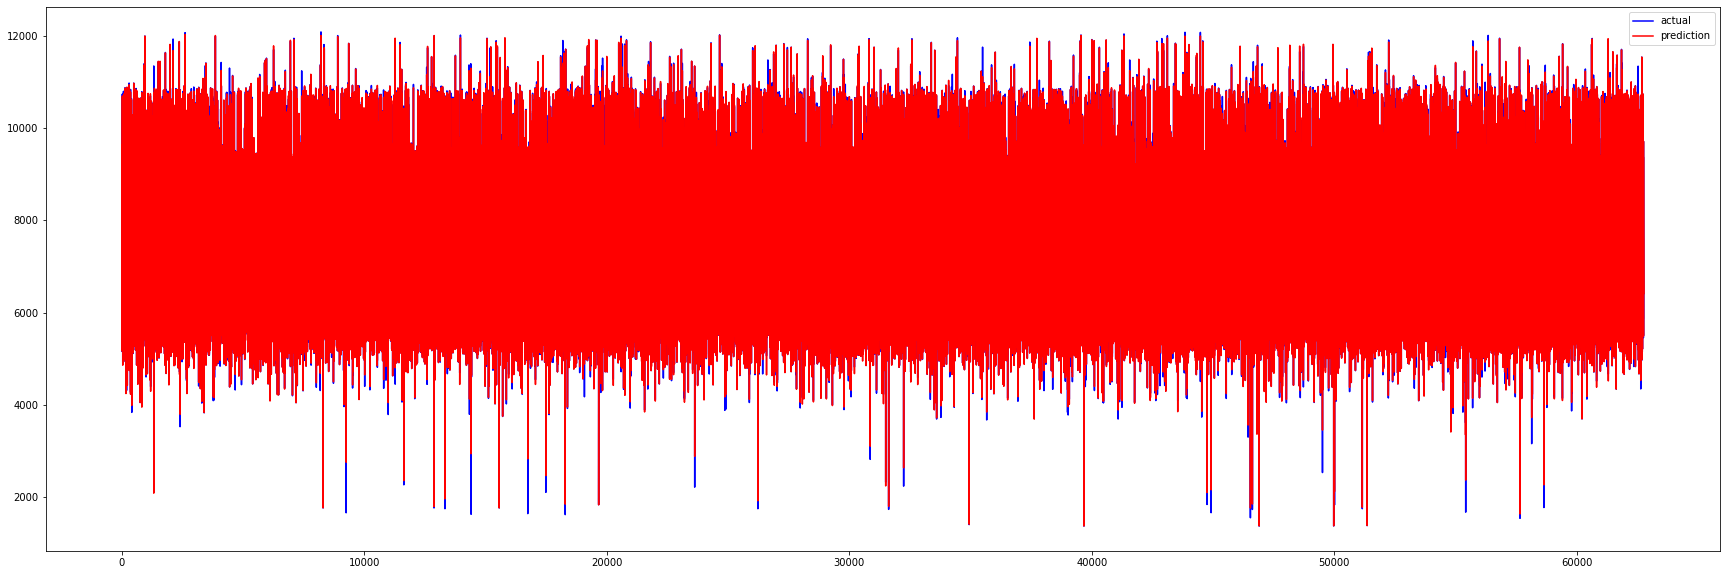

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_two_rf_gen_four.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'ALT_Mean' 'ALT_Min' 'ALT_Max' 'ALTR_Mean' 'ALTR_Min' 'AOA1_Mean'
 'AOA1_Min' 'AOA1_Max' 'AOA2_Mean' 'AOA2_Min' 'AOA2_Max' 'AOAC_Max'
 'AOAI_Mean' 'AOAI_Min' 'BAL1_Mean' 'BAL1_Min' 'BAL1_Max' 'TOCW_Max'
 'TOCW_Min' 'TOCW_Mean' 'SHKR_Max' 'MSQT_2_Max' 'PI_Mean' 'VIB_1_Min'
 'PI_Max' 'PS_Mean' 'PS_Min' 'PS_Max' 'PSA_Mean' 'BAL2_Mean' 'PSA_Min'
 'PT_Mean' 'PT_Min' 'PT_Max' 'RUDP_Mean' 'RUDP_Min' 'RUDP_Max' 'SHKR_Mean'
 'SHKR_Min' 'PSA_Max' 'MSQT_2_Min' 'BAL2_Min' 'CAS_Mean' 'N1T_Min'
 'N1T_Max' 'NSQT_Mean' 'NSQT_Min' 'NSQT_Max' 'TAS_Mean' 'TAS_Min'
 'TH_Mean' 'TH_Min' 'TH_Max' 'TRK_Mean' 'TRK_Min' 'TRK_Max' 'TRKM_Mean'
 'TRKM_Min' 'TRKM_Max' 'VIB_1_Mean' 'N1T_Mean' 'MH_Max' 'MH_Min' 'MH_Mean'
 'CAS_Min' 'CAS_Max' 'CASM_Mean' 'CASM_Min' 'DA_Mean' 'DA_Max' 'GS_Mean'
 'GS_Min' 'BAL2_Max' 'GS_Max' 'LATG_Min' 'LATG_Max' 'LONG_Mean' 'LONG_Min'
 'LONG_Max' 'MACH_Mean' 'MACH_Min' 'MACH_Max' 'LATG_Mean' 'MSQT_2_Mean'
 'PI_Min' 'MSQT_1_Min' 'HF2' 'HYDY' 'ILSF' 'LATP' 'LMOD' 'LOC' 'LONP'
 'M

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0 113 114 115 116 117 119 120 121 122 123 124 127 128 129 131 132 133
 112 111 110 109  88  89 180  91  92  93  94  95 134  96  98  99 100 104
 105 106 107 108  97  87 135 137 162 163 164 165 166 167 168 170 171 172
 173 174 175 176 177 178 179 161 160 159 158 138 139 140 141 143 145 146
 147 136 148 150 151 152 153 154 155 156 157 149  86  90  84  26  28  29
  30  31  32  33  34  25  35  37  38  39  40  41  42  43  85  36  24  22
  21   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  45  46  44  47  68  69  70  71  72  73  74  63  75  77  78  79
  80  81  82  83  76  62 181  60  54  53  56  52  51  50  58  57  49  48
  59  55  27 130 125 144 142 126 169  23 101  64 102 103  12  66  61  65
  67 118]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 602.0974986585435


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.8202447661538377


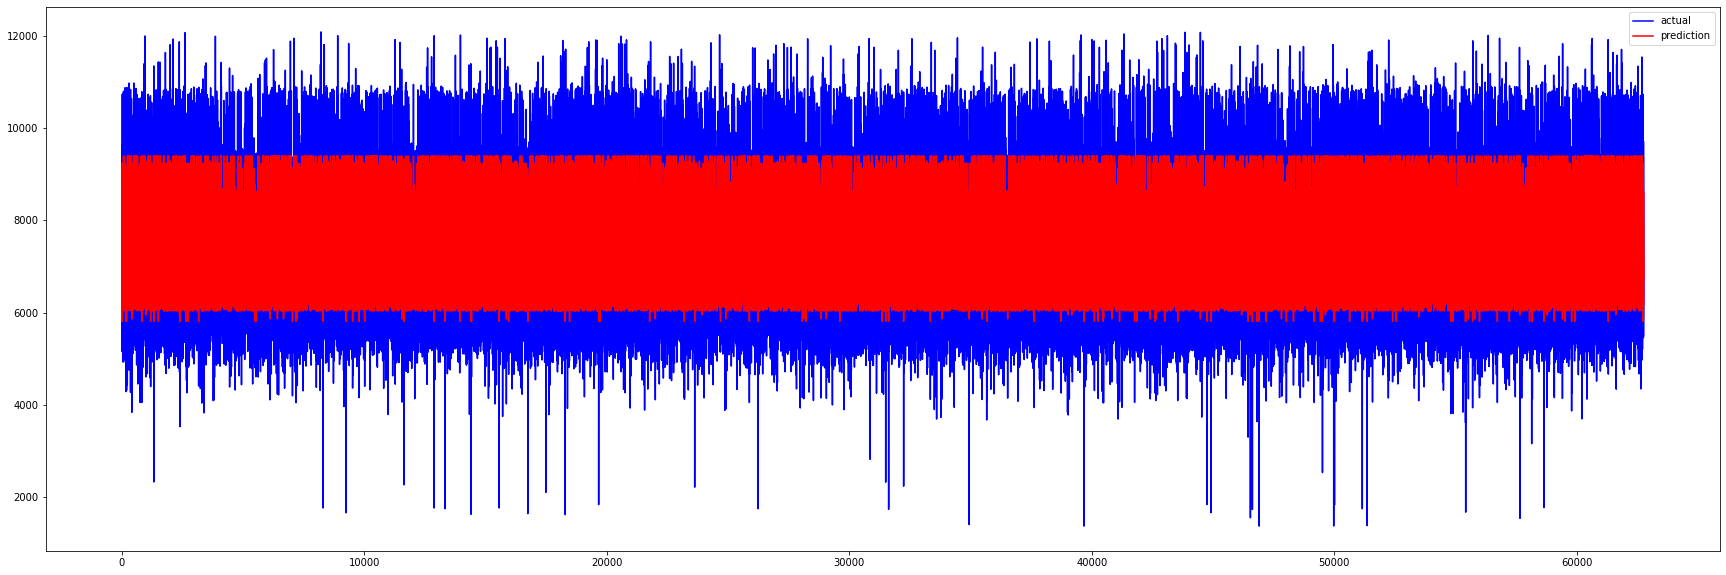

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_two_rf_gen_four.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 193.40425041221044


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9814527328727778


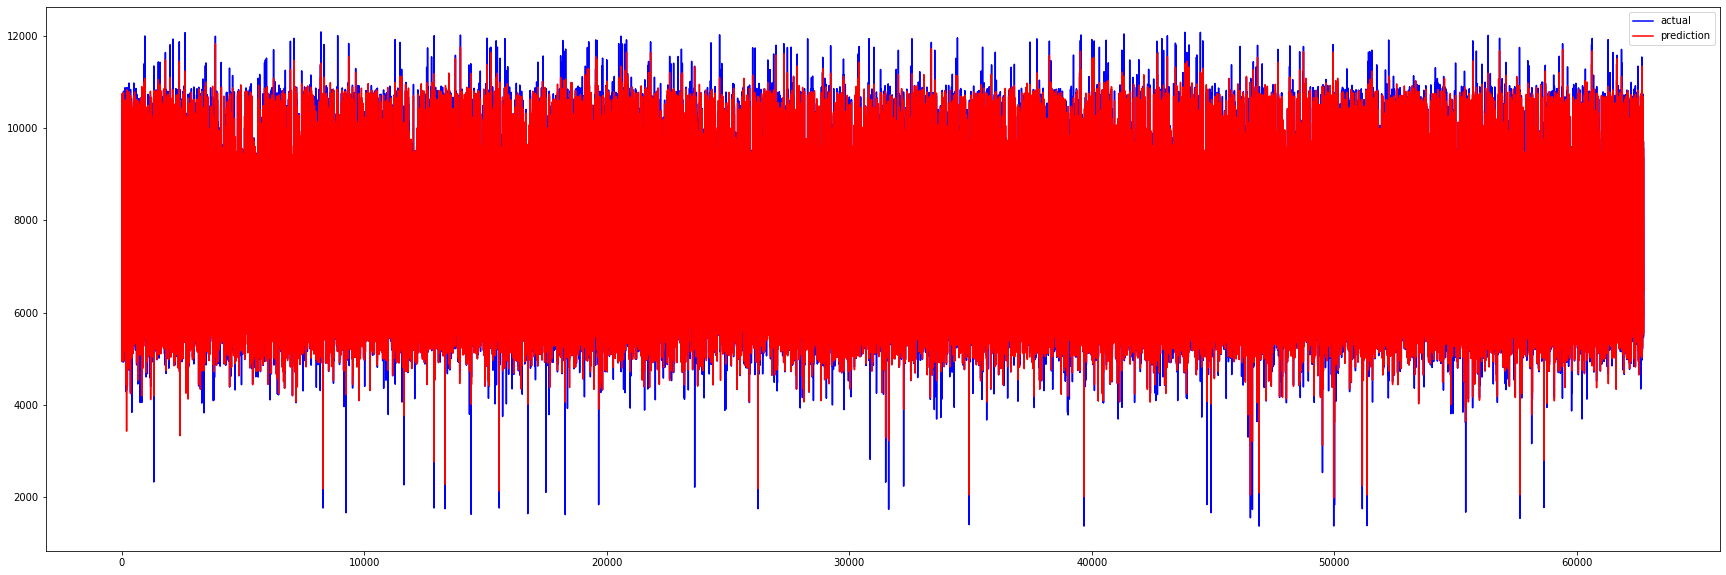

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(182,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
4576/4576 [==============================] - 24s 4ms/step - loss: 423.6588 - mean_absolute_error: 423.6588
Epoch 2/25
4576/4576 [==============================] - 20s 4ms/step - loss: 217.9086 - mean_absolute_error: 217.9086
Epoch 3/25
4576/4576 [==============================] - 22s 5ms/step - loss: 197.0717 - mean_absolute_error: 197.0717
Epoch 4/25
4576/4576 [==============================] - 19s 4ms/step - loss: 184.3515 - mean_absolute_error: 184.3515
Epoch 5/25
4576/4576 [==============================] - 21s 5ms/step - loss: 174.4149 - mean_absolute_error: 174.4149
Epoch 6/25
4576/4576 [==============================] - 18s 4ms/step - loss: 167.6986 - mean_absolute_error: 167.6986
Epoch 7/25
4576/4576 [==============================] - 12s 3ms/step - loss: 161.0305 - mean_absolute_error: 161.0305
Epoch 8/25
4576/4576 [==============================] - 11s 2ms/step - loss: 155.2494 - mean_absolute_error: 155.2494
Epoch 9/25
4576/4576 [==============================] - 

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9937923276733771
MSE: 12519.32420182966
RMSE: 111.88978595845852
MAE: 71.07483911360792


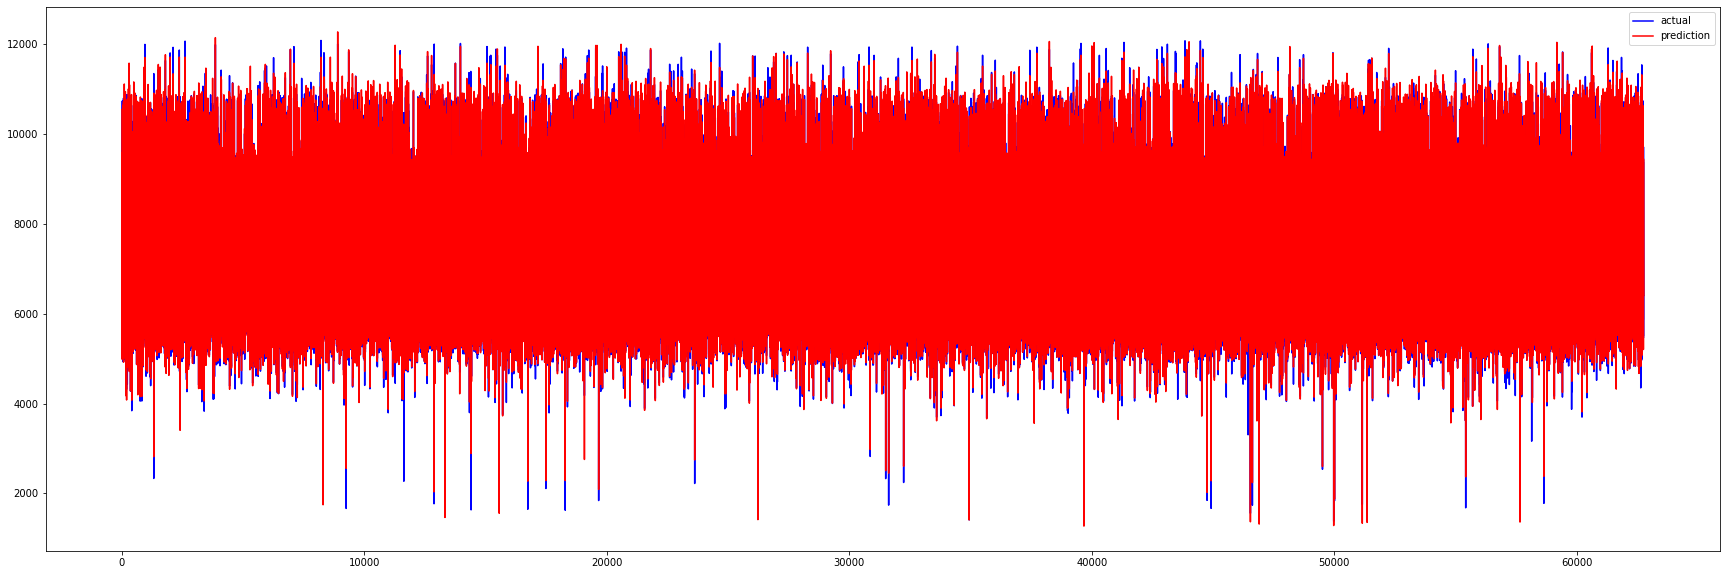

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(182,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 181, 32)           96        
                                                                 
 flatten (Flatten)           (None, 5792)              0         
                                                                 
 dense (Dense)               (None, 64)                370752    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 370,913
Trainable params: 370,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9961987044392466
MSE: 7666.26345723017
RMSE: 87.55720105868032
MAE: 57.7515554870942


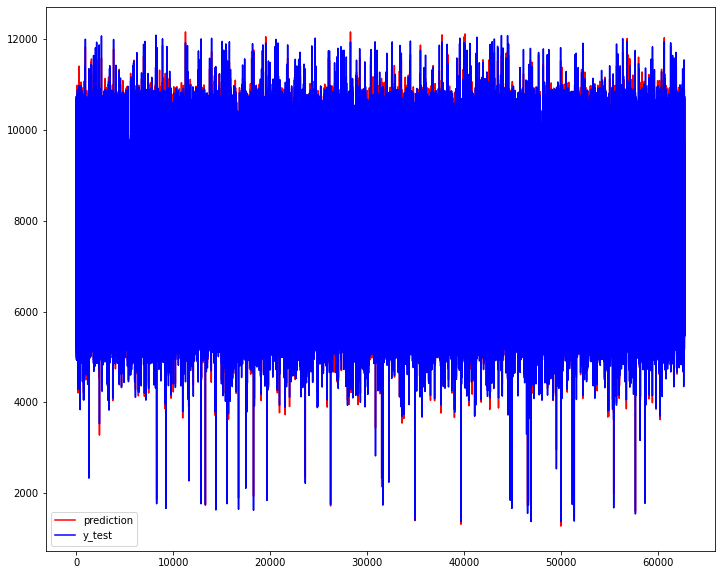

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()